# Task 2: Visualize and Cluster the Data

In [3]:
import pandas as pd
import numpy as np
from datetime import date, timedelta

# Get merged data
merged_data = pd.read_csv('../data/merged_data.csv')

symptom_names = [s for s in merged_data.columns.values if s.startswith('symptom:')]
region_names = merged_data['open_covid_region_code'].unique()


## Popularity of Symptoms

In [4]:
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive

hospitalization = widgets.Dropdown(
    options=[True, False],
    value=False,
    description='Show hospitalizations: ',
)

symptom = widgets.Dropdown(
    options=symptom_names,
    value='symptom:Fever',
    description='Symptoms: ',
)

region = widgets.Dropdown(
    options=['All of USA'] + list(region_names),
    value='All of USA',
    description='Regions: ',
)

def plot_graph(region, symptom, hospitalization):
    regions = region_names
    alpha = 0.2

    fig, symptom_plt = plt.subplots()
    hosp_plt = symptom_plt.twinx()

    # Aggregate hospital data across regions
    hospital_data = merged_data.groupby('date').sum().filter(['hospitalized_new'])

    # Adjust values if selecting individual region
    if region != 'All of USA':
        regions = [region]
        alpha = 0.9
        hospital_data = merged_data.loc[merged_data['open_covid_region_code'] == region].groupby('date').sum().filter(['hospitalized_new'])

    hosp_plt.set_ylabel('New Hospitalizations', color='tab:blue')
    hosp_plt.tick_params(axis='y', labelcolor='tab:blue')

    # Show hospitalization data only if selected
    if hospitalization:
        hosp_plt.plot(hospital_data.index.values, hospital_data['hospitalized_new'].values, color='tab:blue', alpha=0.8)

    for index, region_name in enumerate(regions):

        plot_data = merged_data.groupby('open_covid_region_code').get_group(region_name).sort_values(by=['date'])[['date', symptom]]

        date_data = plot_data['date']
        temp = plot_data[symptom]

        symptom_plt.plot(date_data, temp, color='tab:red', alpha=alpha)

    symptom_plt.tick_params(axis='y', labelcolor='tab:red')
    symptom_plt.set_ylabel('Relative Search Frequency', color='tab:red')
    symptom_plt.set_xlabel('Date')
    fig.tight_layout()
    plt.title(symptom[len('symptom:'):] + " : " + region)
    plt.xticks(rotation=90)
    plt.show()

interactive(plot_graph, region=region, symptom=symptom, hospitalization=hospitalization)

interactive(children=(Dropdown(description='Regions: ', options=('All of USA', 'US-AL', 'US-AR', 'US-AZ', 'US-CO', 'US-CT', 'US-FL', 'US-GA', 'US-HI', 'US-ID', 'US-IN', 'US-KS', 'US-KY', 'US-MA', 'US-MD', 'US-ME', 'US-MN', 'US-MS', 'US-MT', 'US-ND', 'US-NE', 'US-NH', 'US-NJ', 'US-NM', 'US-NY', 'US-OH', 'US-OK', 'US-OR', 'US-RI', 'US-SC', 'US-SD', 'US-TN', 'US-UT', 'US-VA', 'US-WA', 'US-WI', 'US-WY'), value='All of USA'), Dropdown(description='Symptoms: ', index=33, options=('symptom:Abdominal obesity', 'symptom:Abdominal pain', 'symptom:Acne', 'symptom:Alcoholism', 'symptom:Allergy', 'symptom:Anemia', 'symptom:Anxiety', 'symptom:Arthritis', 'symptom:Asthma', 'symptom:Attention deficit hyperactivity disorder', 'symptom:Autoimmune disease', 'symptom:Back pain', 'symptom:Bleeding', 'symptom:Bloating', 'symptom:Bone fracture', 'symptom:Bruise', 'symptom:Burn', 'symptom:Candidiasis', 'symptom:Chest pain', 'symptom:Common cold', 'symptom:Constipation', 'symptom:Cough', 'symptom:Cramp', 'symptom:Dementia', 'symptom:Depression', 'symptom:Dermatitis', 'symptom:Diabetes', 'symptom:Diarrhea', 'symptom:Dizziness', 'symptom:Dysmenorrhea', 'symptom:Epilepsy', 'symptom:Erectile dysfunction', 'symptom:Fatigue', 'symptom:Fever', 'symptom:Flatulence', 'symptom:Gastroesophageal reflux disease', 'symptom:Generalized anxiety disorder', 'symptom:Gout', 'symptom:Hair loss', 'symptom:Hay fever', 'symptom:Headache', 'symptom:Heart arrhythmia', 'symptom:Heartburn', 'symptom:Hemorrhoids', 'symptom:Hives', 'symptom:Hypertension', 'symptom:Hypotension', 'symptom:Hypothyroidism', 'symptom:Implantation bleeding', 'symptom:Indigestion', 'symptom:Infection', 'symptom:Inflammation', 'symptom:Insomnia', 'symptom:Iron deficiency', 'symptom:Itch', 'symptom:Kidney stone', 'symptom:Knee Pain', 'symptom:Low back pain', 'symptom:Major depressive disorder', 'symptom:Migraine', 'symptom:Myocardial infarction', 'symptom:Nausea', 'symptom:Neck pain', 'symptom:Obesity', 'symptom:Otitis', 'symptom:Pain', 'symptom:Panic attack', 'symptom:Paresthesia', 'symptom:Perspiration', 'symptom:Psychosis', 'symptom:Scar', 'symptom:Sciatica', 'symptom:Sinusitis', 'symptom:Skin condition', 'symptom:Skin rash', 'symptom:Skin ulcer', 'symptom:Sleep apnea', 'symptom:Sleep disorder', 'symptom:Sore throat', 'symptom:Stroke', 'symptom:Swelling', 'symptom:Type 2 diabetes', 'symptom:Urinary tract infection', 'symptom:Vaginal discharge', 'symptom:Vertigo', 'symptom:Vomiting', 'symptom:Wart', 'symptom:Weight gain', 'symptom:Xeroderma'), value='symptom:Fever'), Dropdown(description='Show hospitalizations: ', index=1, options=(True, False), value=False), Output()), _dom_classes=('widget-interact',))

## Principal Component Analysis (on all symptoms)

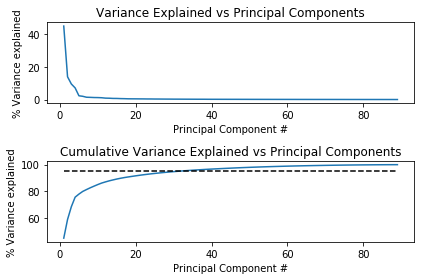

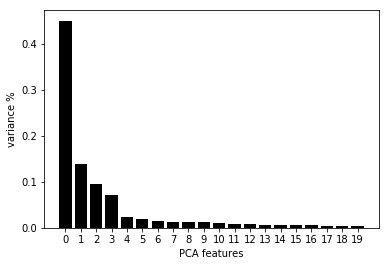

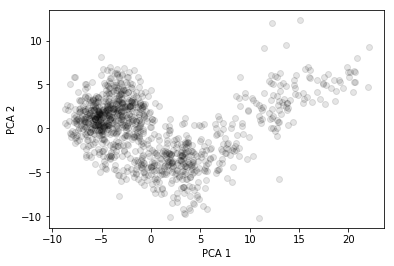

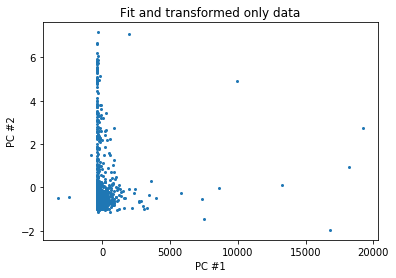

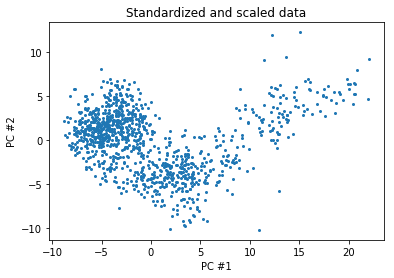

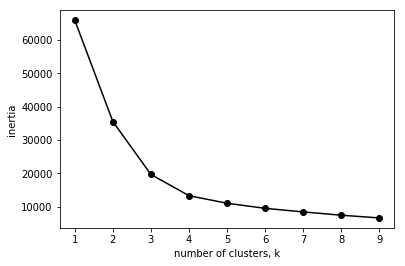

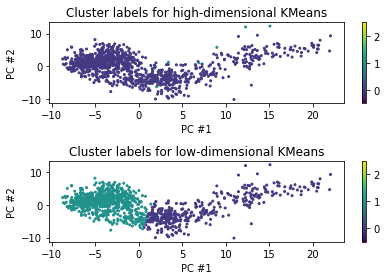

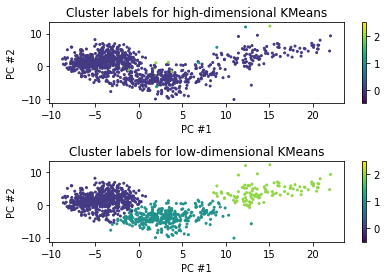

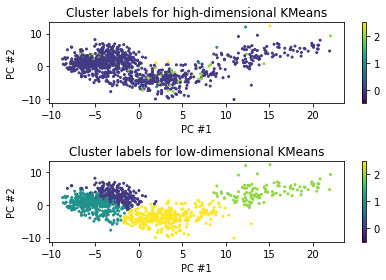

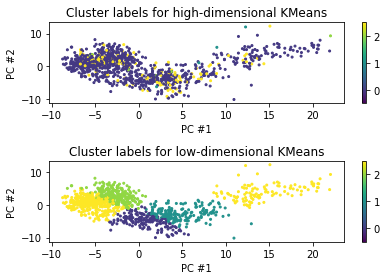

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#PCA
X = merged_data[merged_data.columns[4:len(symptom_names)+4]]

# Figure out how many components (kinda useless)
pca2 = PCA()
pca2.fit_transform(StandardScaler().fit_transform(X))
num_pc_components = len(pca2.explained_variance_ratio_)
plt.tight_layout()
plt.subplot(2,1,1)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*pca2.explained_variance_ratio_)
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Variance Explained vs Principal Components")

plt.subplot(2,1,2)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*np.cumsum(pca2.explained_variance_ratio_))
plt.plot(np.linspace(1,num_pc_components,num_pc_components),95*np.ones((num_pc_components,)),'k--')
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Cumulative Variance Explained vs Principal Components")
plt.tight_layout()
plt.show()


pca = PCA(n_components=20)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X))# Plot the explained variances
#principalComponents = pca.fit(X)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
plt.show()

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#PCA graph
markersize=4
pca = PCA(n_components=3)
#pca.fit(X)
#X_reduced = pca.transform(X)
X_reduced = pca.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=markersize)
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Fit and transformed only data")
plt.show()

#PCA graph with standardized data
markersize=4
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(StandardScaler().fit_transform(X))
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=markersize)
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Standardized and scaled data")
plt.show()


#knee rule to determine number of clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    #model.fit(X)
    model.fit(PCA_components.iloc[:, :3])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

ks = range(2, 6)
for k in ks:
    #Clusters
    clusterNum=k
    #high is raw data
    kmeans_high = KMeans(n_clusters=clusterNum, random_state=0)
    kmeans_high.fit(X)
    y_pred_high = kmeans_high.predict(X)

    #low is reduced dimensionality data
    kmeans_low = KMeans(n_clusters=clusterNum, random_state=0)
    kmeans_low.fit(X_reduced)
    y_pred_low = kmeans_low.predict(X_reduced)

    # Plot 3 scatter plots -- two for high and low dimensional clustering results and one indicating the ground truth labels

    plt.subplot(2,1,1)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], s=markersize, c=y_pred_high)
    plt.colorbar(ticks=[0,1,2])
    plt.clim(-0.5,2.5)
    plt.xlabel("PC #1")
    plt.ylabel("PC #2")
    plt.title("Cluster labels for high-dimensional KMeans")

    plt.subplot(2,1,2)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], s=markersize, c=y_pred_low)
    plt.colorbar(ticks=[0,1,2])
    plt.clim(-0.5,2.5)
    plt.xlabel("PC #1")
    plt.ylabel("PC #2")
    plt.title("Cluster labels for low-dimensional KMeans")

    plt.tight_layout()
    plt.show()

## Principal Component Analysis (on common Covid-19 symptoms)

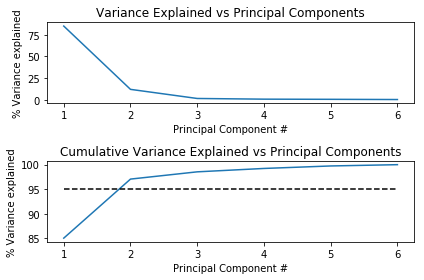

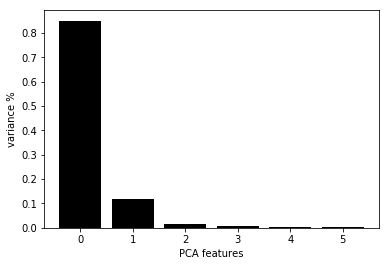

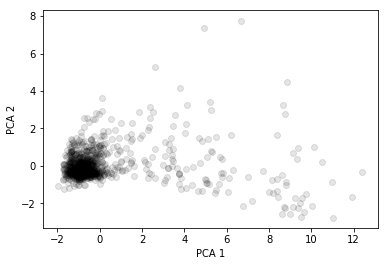

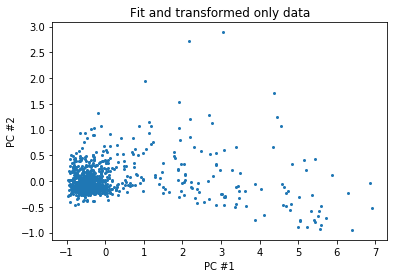

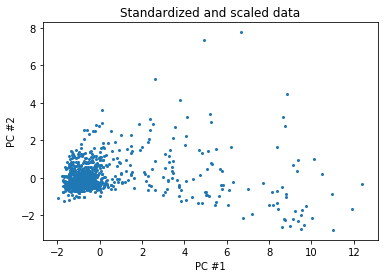

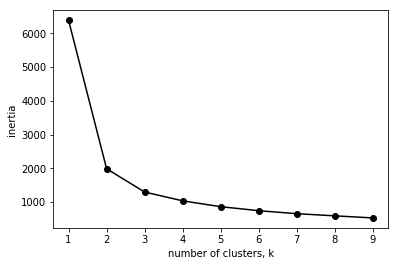

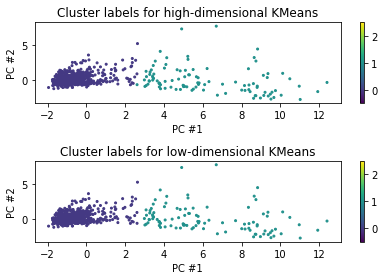

In [8]:
#PCA

covid_symptoms = ['symptom:Common cold', 'symptom:Cough', 'symptom:Fever', 'symptom:Hay fever', 'symptom:Infection', 'symptom:Sore throat']

X = merged_data[covid_symptoms]

#Figure out how many components (kinda useless)
pca2 = PCA()
pca2.fit_transform(StandardScaler().fit_transform(X))
num_pc_components = len(pca2.explained_variance_ratio_)
plt.tight_layout()
plt.subplot(2,1,1)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*pca2.explained_variance_ratio_)
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Variance Explained vs Principal Components")

plt.subplot(2,1,2)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*np.cumsum(pca2.explained_variance_ratio_))
plt.plot(np.linspace(1,num_pc_components,num_pc_components),95*np.ones((num_pc_components,)),'k--')
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Cumulative Variance Explained vs Principal Components")
plt.tight_layout()
plt.show()


pca = PCA(n_components=len(covid_symptoms))
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X))# Plot the explained variances
#principalComponents = pca.fit(X)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
plt.show()

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#PCA graph
markersize=4
pca = PCA(n_components=2)
#pca.fit(X)
#X_reduced = pca.transform(X)
X_reduced = pca.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=markersize)
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Fit and transformed only data")
plt.show()

#PCA graph with standardized data
markersize=4
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(StandardScaler().fit_transform(X))
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=markersize)
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Standardized and scaled data")
plt.show()



#knee rule to determine number of clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    #model.fit(X)
    model.fit(PCA_components.iloc[:, :3])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


#Clusters
clusterNum=2
#high is raw data
kmeans_high = KMeans(n_clusters=clusterNum, random_state=0)
kmeans_high.fit(X)
y_pred_high = kmeans_high.predict(X)

#low is reduced dimensionality data
kmeans_low = KMeans(n_clusters=clusterNum, random_state=0)
kmeans_low.fit(X_reduced)
y_pred_low = kmeans_low.predict(X_reduced)

# Plot 3 scatter plots -- two for high and low dimensional clustering results and one indicating the ground truth labels

plt.subplot(2,1,1)
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=markersize, c=y_pred_high)
plt.colorbar(ticks=[0,1,2])
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Cluster labels for high-dimensional KMeans")

plt.subplot(2,1,2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=markersize, c=y_pred_low)
plt.colorbar(ticks=[0,1,2])
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Cluster labels for low-dimensional KMeans")

plt.tight_layout()
plt.show()